In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/loan_data.csv', index_col=None)
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.columns = [c.replace(".", "_") for c in df.columns]

In [ ]:
# Understand the variables
variables = pd.DataFrame(columns=['Variable','Number_of_unique_values','Number_of_nulls', 'Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].isnull().sum(), df[var].unique().tolist()]

variables

,Variable,Number_of_unique_values,Number_of_nulls,Values
0,credit_policy,2,0,"[1, 0]"
1,purpose,7,0,"[debt_consolidation, credit_card, all_other, h..."
2,int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078..."
3,installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13..."
4,log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299..."
5,dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ..."
6,fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ..."
7,days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406..."
8,revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,..."
9,revol_util,1035,0,"[52.1, 76.7, 25.6, 73.2, 39.5, 51.0, 76.8, 68...."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico", "days_with_cr_line", "revol_bal", "revol_util", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
BINARY = ["credit_policy","not_fully_paid"]
CATEGORICAL = ["purpose"]
LOAN = ["int_rate", "installment", "days_with_cr_line", "revol_bal", "revol_util"]
PERSON = ["log_annual_inc", "dti", "fico", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
TARGET = ["not_fully_paid"]


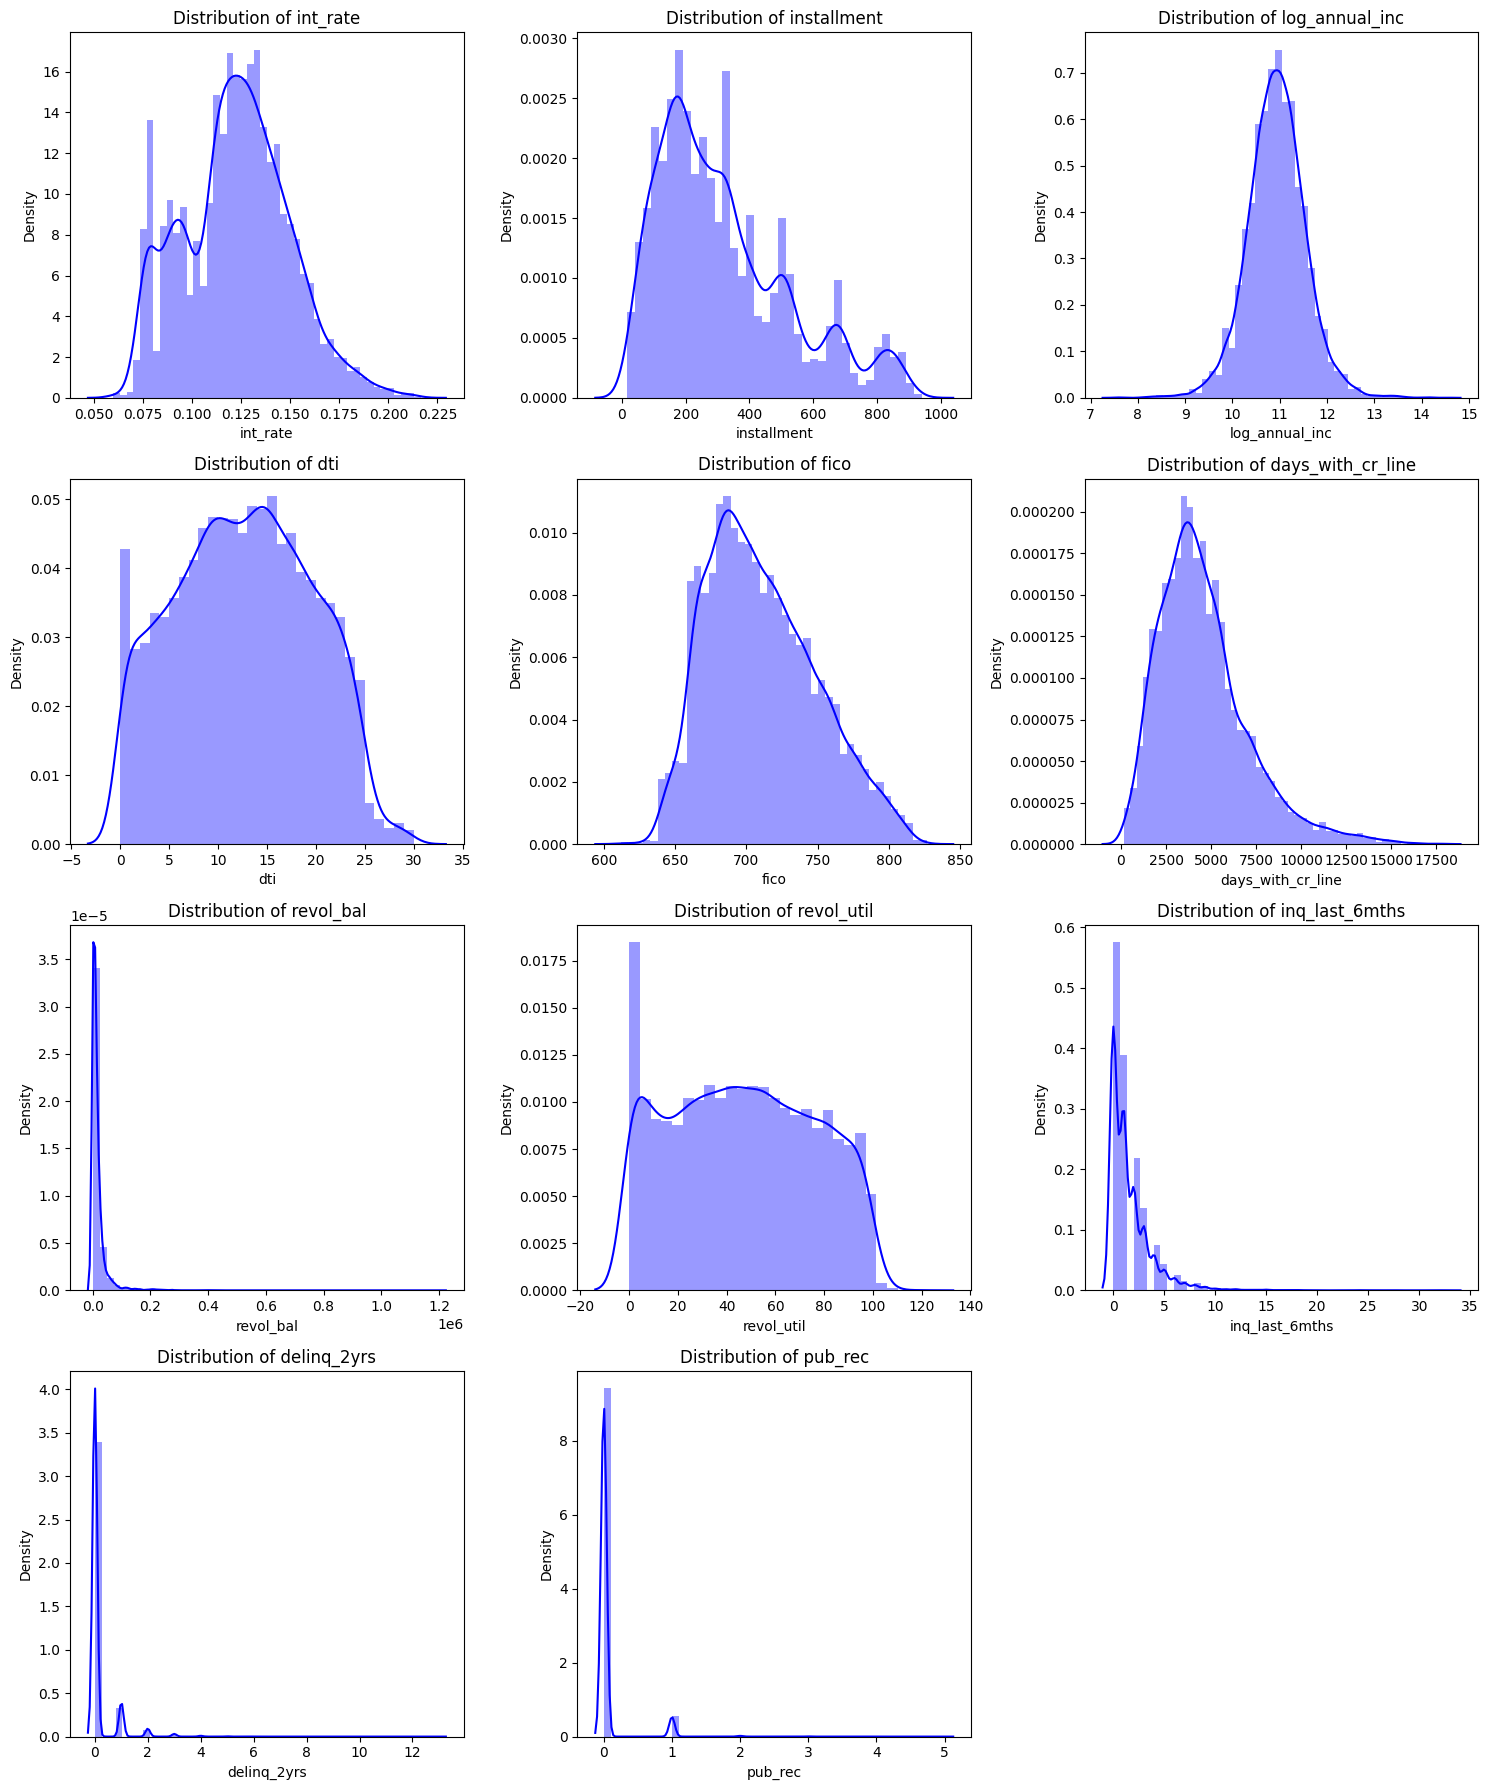

In [ ]:
plt.figure(figsize=(15, 18))
for i, col in enumerate(NUMERIC):
    # Plot distribution
    plt.subplot(4,3,i+1); sns.distplot(df[col], color='blue')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df[NUMERIC].describe()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


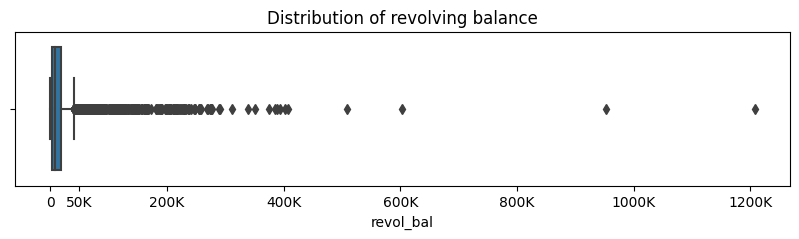

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x='revol_bal')
plt.xticks(ticks=[0,50000,200000,400000,600000,800000,1000000,1200000], labels=['0','50K','200K','400K','600K','800K','1000K','1200K'])
plt.title("Distribution of revolving balance");

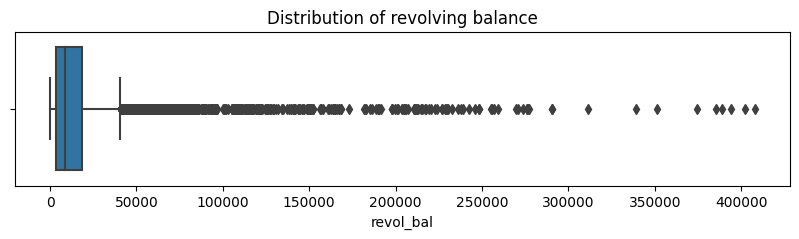

In [ ]:
# get the indices of the extreme outliers and drop them
indices = df[df['revol_bal'] > 500000].index
df_clean = df.drop(indices)
# check the boxplot again:
plt.figure(figsize=(10,2))
sns.boxplot(data=df_clean, x='revol_bal')
plt.title("Distribution of revolving balance");

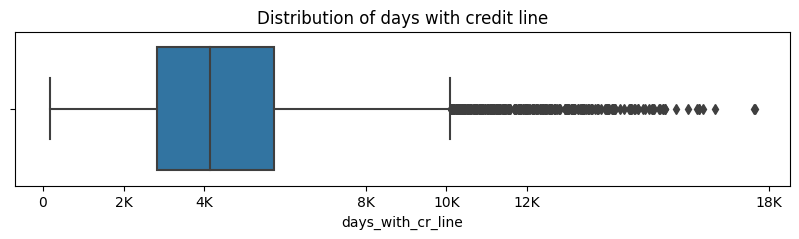

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x='days_with_cr_line')
plt.xticks(ticks=[0,2000,4000,8000,10000,12000,18000], labels=['0','2K','4K','8K','10K','12K','18K'])
plt.title("Distribution of days with credit line");

Text(0.5, 1.0, 'Count of loans by purpose')

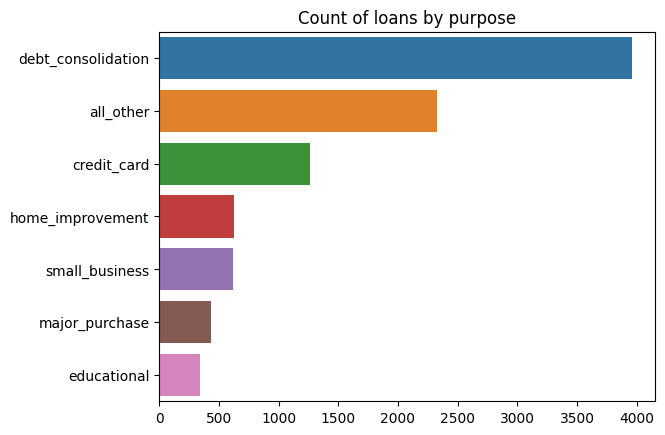

In [ ]:
# import visualisations
import matplotlib.ticker as mtick


#To gain some insights, we can visualize what kind of loans people get:
sns.countplot(y =df_clean.purpose,order = df_clean.purpose.value_counts().index)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Count of loans by purpose")

Text(0.5, 0, '')

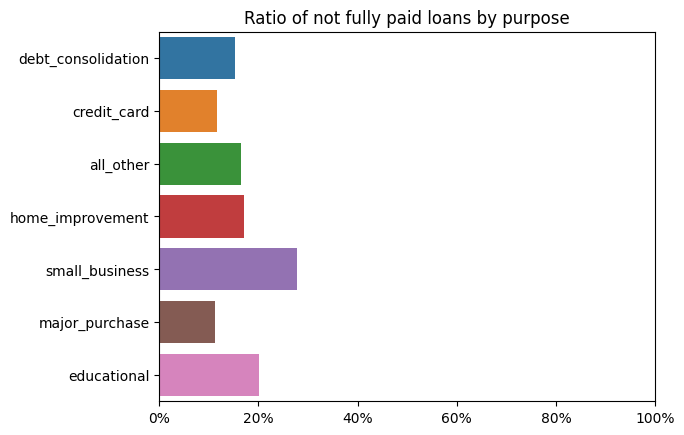

In [ ]:
#convert not_fully_paid to int for convenience, to calc the mean
ax = sns.barplot( y=df_clean.purpose, x=df_clean.not_fully_paid.astype('int'), ci=None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.title("Ratio of not fully paid loans by purpose")
plt.xlim(0,1)
plt.ylabel(None)
plt.xlabel(None)

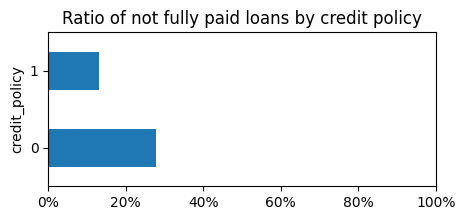

In [ ]:
# display the ratio of not_fully_paid by credit_policy
ratio = df_clean.groupby('credit_policy')['not_fully_paid'].mean()
ax = ratio.plot.barh(figsize=(5,2), title='Ratio of not fully paid loans by credit policy')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xlim(0,1);

In [ ]:
def stack_bar(d, xlabel, hue='lead_type'):
    plt.figure(figsize=(5, 5))
    new_df = (d.groupby([xlabel, hue])['credit_policy'].count() / d.groupby([xlabel])['credit_policy'].count())
    new_df.unstack().plot.bar(stacked=True)
    plt.ylabel('%')
    plt.title(f'100% stack bar chart \n By {xlabel}')

<Figure size 500x500 with 0 Axes>

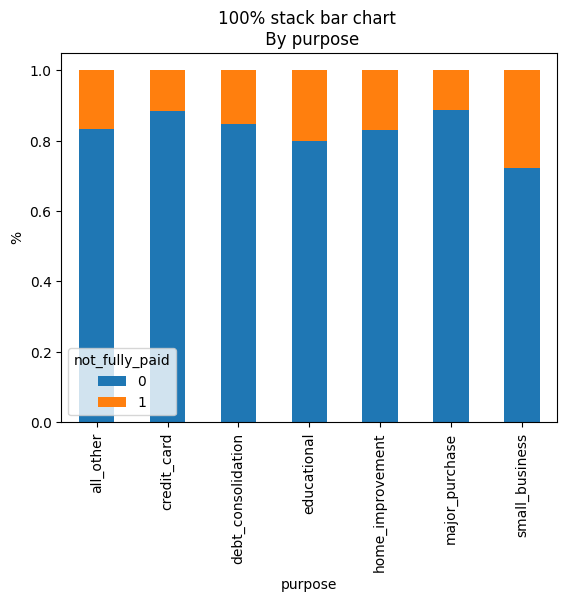

In [ ]:
stack_bar(df_clean, 'purpose', 'not_fully_paid')

In [ ]:
def stacked_bar_credit_policy(df):
    plt.figure(figsize=(10, 6))
    policy_counts = df.groupby(['purpose', 'credit_policy'])['credit_policy'].count().unstack()
    policy_counts.plot(kind='bar', stacked=True)

    plt.ylabel('Count of Loans')
    plt.title('Credit Policy by Loan Purpose')
    plt.legend(['Non-Compliant', 'Compliant'], loc='upper right')
    plt.xticks(rotation=45)

    plt.show()

<Figure size 1000x600 with 0 Axes>

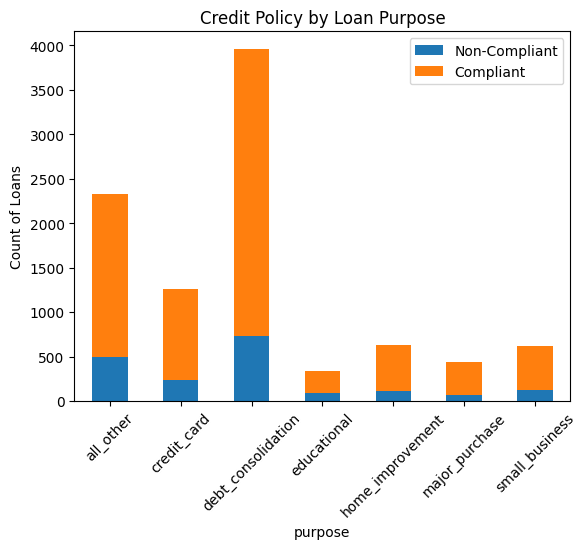

In [ ]:
stacked_bar_credit_policy(df_clean)


In [ ]:
def scatter_fico_interest(df):
    plt.figure(figsize=(13, 6))
    plt.scatter(df['int_rate'],df['fico'], alpha=0.5)

    plt.xlabel('Interest Rate')
    plt.ylabel('FICO Score')
    plt.title('Interest Rate vs FICO Score')

    plt.show()

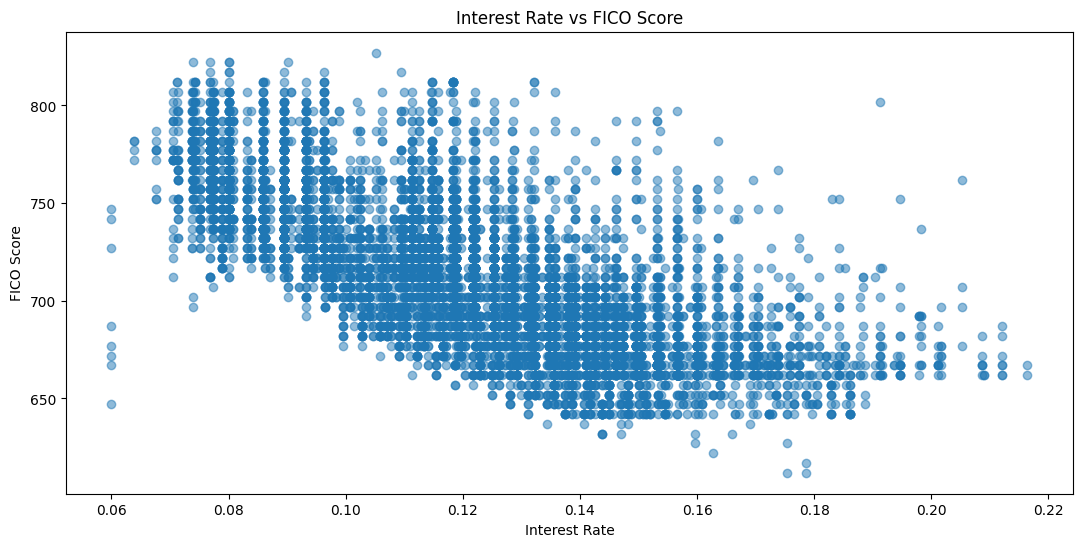

In [ ]:
scatter_fico_interest(df_clean)

In [ ]:
def boxplot_dti_loan_purpose(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot([df[df['purpose'] == purpose]['dti'] for purpose in df['purpose'].unique()],
                labels=df['purpose'].unique())

    plt.xlabel('Loan Purpose')
    plt.ylabel('Debt-to-Income Ratio (dti)')
    plt.title('Box Plot of Debt-to-Income Ratio by Loan Purpose')
    plt.xticks(rotation=45)

    plt.show()

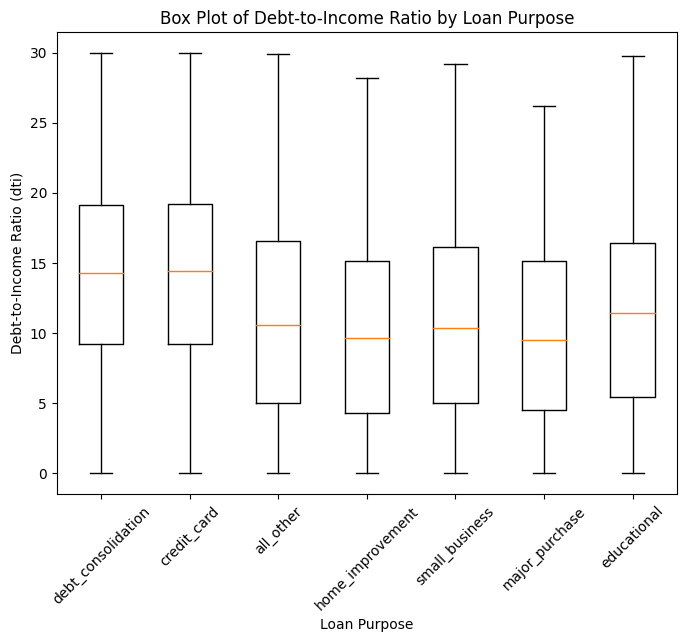

In [ ]:
boxplot_dti_loan_purpose(df_clean)